
# Project for UCD Professional Academy

Data Source: https://www.kaggle.com/datasets/rajeevw/ufcdata?select=data.csv


In [1]:
# importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data into a pandas DataFrame

df_data = pd.read_csv('data.csv')
df_fighter = pd.read_csv('raw_fighter_details.csv')
df_fights = pd.read_csv('raw_total_fight_data.csv', sep=';')

In [3]:
# display the first 5 rows of df_data
df_data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [5]:
# checking data types
df_data.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object

In [6]:
# more data cleaning will take place later, but I know I'll need date, so creating a datetime column now.
df_data['Date_frmt'] = pd.to_datetime(df_data['date'])

In [7]:
# verifying that the above is correct.
df_data.dtypes

R_fighter               object
B_fighter               object
Referee                 object
date                    object
location                object
                     ...      
R_Reach_cms            float64
R_Weight_lbs           float64
B_age                  float64
R_age                  float64
Date_frmt       datetime64[ns]
Length: 145, dtype: object

In [8]:
df_data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,2021-03-20
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,2021-03-20
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,2021-03-20
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,2021-03-20
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,2021-03-20


In [9]:
# check the shape of df_data
df_data.shape

(6012, 145)

In [10]:
# view summary of df_data
df_data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [11]:
df_fighter.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


In [12]:
df_fighter.shape

(3596, 14)

In [13]:
df_fighter.describe()

,SLpM,SApM,TD_Avg,Sub_Avg
count,3596.000000,3596.000000,3596.000000,3596.000000
mean,2.279633,2.982948,1.211243,0.636707
std,1.901956,2.814008,1.914020,1.566843
min,0.000000,0.000000,0.000000,0.000000
25%,0.700000,1.400000,0.000000,0.000000
50%,2.170000,2.760000,0.510000,0.000000
75%,3.420000,4.002500,1.885000,0.800000
max,19.910000,52.500000,32.140000,21.900000


In [14]:
df_fights.shape

(6012, 41)

In [15]:
df_fights.describe()

,R_KD,B_KD,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,last_round
count,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000
mean,0.249834,0.179807,0.481371,0.343979,0.137725,0.135396,2.316700
std,0.523408,0.456132,0.924078,0.791808,0.422296,0.414708,1.008284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
max,5.000000,4.000000,10.000000,7.000000,5.000000,3.000000,5.000000



### Data Cleaning


In [16]:
# check for null values
print("Total nulls in df_data: ", df_data.isna().sum().sum())

Total nulls in df_data:  106494


In [17]:
# check for total null values, set max columns to none to show all data.
pd.set_option('display.max_columns', None)
df_data.isna().sum().sort_values()

R_fighter                        0
B_current_win_streak             0
B_current_lose_streak            0
B_longest_win_streak             0
B_wins                           0
                              ... 
B_avg_GROUND_landed           1427
B_avg_GROUND_att              1427
B_avg_opp_CLINCH_landed       1427
B_avg_opp_TOTAL_STR_landed    1427
B_avg_HEAD_att                1427
Length: 145, dtype: int64

In [18]:
# The nulls in "B_avg_DISTANCE_att" (and all other stats) are null for debuting fighters in the UFC. 
# As these columns represent previous performance in the UFC, they will only populated for a fighter's subsequent fights.
# The reason why the blue corner has more nulls is because champions and higher-ranked fighters are assigned the red corner, thus debutants generally debut in the blue corner.
# Example below, see fighter Tai Tuivasa's fights. His first has nulls.

tai = df_data[(df_data['R_fighter'] == 'Tai Tuivasa') | (df_data['B_fighter'] == 'Tai Tuivasa')]



In [22]:
# inspect other nulls
pd.set_option('display.max_columns', False)

# check reach column for red fighter. 
get_r_reach_cm_na = df_data[df_data['R_Reach_cms'].isna()]
get_r_reach_cm_na.groupby(['R_fighter']).size().sort_values(ascending=False)

R_fighter
Pedro Rizzo      9
Don Frye         9
Dan Severn       9
David Abbott     8
Pat Miletich     8
                ..
Joe Moreira      1
Joe Slick        1
John Lewis       1
John Teixeira    1
Yusuke Kasuya    1
Length: 241, dtype: int64

In [23]:
# From the above, I can see the large volume of these nulls are mostly from old fighters who competed in the early days.
# Due to the sports changes, we may limit the data to after a certain date. But we can check of the other files contain this data to join.
# First, let's see if most nulls disappear after a date limitation.

NameError: name 'get_r_reach_cm' is not defined

In [24]:
get_r_reach_cm_na_dfilt = get_r_reach_cm_na[(get_r_reach_cm_na['Date_frmt'] >= '1 Jan 2004')] 
print('Null values in r_reach_cm: ' + str(get_r_reach_cm_na['R_Reach_cms'].isna().sum()) )
print('Null values in r_reach_cm with date filter: ' + str(get_r_reach_cm_na_dfilt['R_Reach_cms'].isna().sum()) )


Null values in r_reach_cm: 406
Null values in r_reach_cm with date filter: 167


In [359]:
# This removes quite a few, but there are still some missing values. 
#Verify that values are missing from the df_fighter DataFrame, as well.

df_fighter[(df_fighter['fighter_name'].isin(get_r_reach_cm_na['R_fighter']))].sort_values(by=['fighter_name'])

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
2389,Alan Omer,"5' 10""",145 lbs.,NaN,Orthodox,"Sep 14, 1988",3.49,55%,2.21,64%,1.69,42%,66%,0.0
535,Albert Cheng,"5' 11""",170 lbs.,NaN,Orthodox,"Feb 07, 1985",1.00,41%,2.60,71%,0.00,0%,0%,0.0
3306,Alberto Uda,"6' 3""",185 lbs.,NaN,Orthodox,"Aug 08, 1984",1.79,52%,3.49,45%,2.83,50%,66%,0.0
1427,Alex Hunter,"5' 9""",226 lbs.,NaN,Orthodox,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3067,Alex Soto,"5' 8""",135 lbs.,NaN,Southpaw,"Feb 15, 1984",2.95,25%,5.02,59%,2.82,30%,0%,0.0
830,Alexis Dufresne,"5' 9""",135 lbs.,NaN,Orthodox,"Aug 31, 1990",1.33,27%,3.33,60%,1.50,50%,50%,0.0
284,Amaury Bitetti,"5' 9""",185 lbs.,NaN,Orthodox,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
2703,Andre Roberts,"6' 2""",345 lbs.,NaN,Orthodox,"Feb 24, 1965",0.00,0%,0.00,0%,0.00,0%,0%,0.0
3097,Andreas Stahl,"5' 11""",170 lbs.,NaN,Orthodox,"May 20, 1988",2.83,37%,4.74,57%,1.55,66%,80%,0.0
2925,Andrei Semenov,"6' 0""",185 lbs.,NaN,Orthodox,"Jun 17, 1977",0.78,15%,2.44,60%,1.74,80%,55%,0.4


In [27]:
# We could find another dataset or use web scraping to get this value. 
# However, I assume reach and height will be highly correlated, so if true, we can use that.

#yanez_fights = df_data[(df_data['R_fighter'] == 'Adrian Yanez') | (df_data['B_fighter'] == 'Adrian Yanez')]
#yanez = df_fighter[(df_fighter['fighter_name'] == 'Adrian Yanez')]

df_data[['R_Height_cms', 'R_Reach_cms']].corr(method='pearson')


,R_Height_cms,R_Reach_cms
R_Height_cms,1.000000,0.893139
R_Reach_cms,0.893139,1.000000


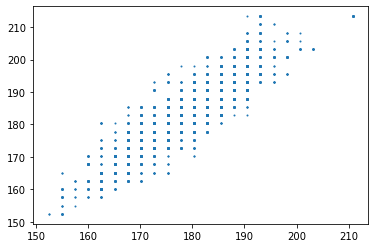

In [28]:
plt.scatter(df_data['R_Height_cms'], df_data['R_Reach_cms'], s=1)

In [362]:
df_data[['R_Height_cms', 'R_Reach_cms']].corr(method='pearson')

,R_Height_cms,R_Reach_cms
R_Height_cms,1.000000,0.893139
R_Reach_cms,0.893139,1.000000


In [36]:
# function that converts feet and inches format to cm.
def convert_to_cm(height):
    if height is np.NaN:
        return height
    elif len(height.split("'")) == 2:
        feet = float(height.split("'")[0])
        inches = int(height.split("'")[1].replace(' ', '').replace('"',''))
        return (feet * 30.48) + (inches * 2.54)
    else:
        return float(height.replace('"','')) * 2.54

In [110]:
# convert all heights to cm. Created a new column, but this could be done in-line. Unsure if I'll need the old columns later
df_fighter['Height_cm'] = df_fighter['Height'].apply(convert_to_cm)

In [111]:
# remove lbs. from weights, convert to numeric.
df_fighter['Weight_lbs'] = (df_fighter['Weight'].str.replace(r'[^0-9]', '', regex=True))
df_fighter['Weight_lbs'] = pd.to_numeric(df_fighter['Weight_lbs'])

In [112]:
# remove " from reach and convert to cm.
df_fighter['Reach_cm'] = pd.to_numeric(df_fighter['Reach'].str.replace(r'[^0-9]', '', regex=True)) * 2.54 

In [122]:
test = df_fighter[(df_fighter['fighter_name'] == 'Tai Tuivasa')]
test_height_rng_start = test['Height_cm'] - test['Height_cm'] * 0.02
test_height_rng_end = test['Height_cm'] + test['Height_cm'] * 0.02


In [123]:
test['Height_cm']

3298    187.96
Name: Height_cm, dtype: float64

In [124]:
test_height_rng_start

3298    184.2008
Name: Height_cm, dtype: float64

In [125]:
test_height_rng_end

3298    191.7192
Name: Height_cm, dtype: float64

In [126]:
get_heights = df_fighter.loc[(df_fighter['Height_cm'].values >= test_height_rng_start.values) & (df_fighter['Height_cm'].values <= test_height_rng_end.values)]


In [127]:
get_heights.describe()

,SLpM,SApM,TD_Avg,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,354.000000
mean,2.434944,3.094636,1.293305,0.788936,187.643389,203.148459,192.372712
std,2.002906,2.914901,2.326425,1.922073,2.062028,34.515648,5.285532
min,0.000000,0.000000,0.000000,0.000000,185.420000,135.000000,180.340000
25%,0.932500,1.722500,0.000000,0.000000,185.420000,185.000000,187.960000
50%,2.285000,2.755000,0.555000,0.000000,187.960000,205.000000,190.500000
75%,3.467500,3.930000,1.805000,1.000000,190.500000,224.750000,195.580000
max,19.910000,49.410000,32.140000,21.900000,190.500000,410.000000,213.360000


In [128]:
df_fighter.describe()

,SLpM,SApM,TD_Avg,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
count,3596.000000,3596.000000,3596.000000,3596.000000,3333.000000,3522.000000,1684.000000
mean,2.279633,2.982948,1.211243,0.636707,178.593321,173.022147,182.439572
std,1.901956,2.814008,1.914020,1.566843,8.790437,39.946401,10.609492
min,0.000000,0.000000,0.000000,0.000000,152.400000,105.000000,147.320000
25%,0.700000,1.400000,0.000000,0.000000,172.720000,145.000000,175.260000
50%,2.170000,2.760000,0.510000,0.000000,177.800000,170.000000,182.880000
75%,3.420000,4.002500,1.885000,0.800000,185.420000,185.000000,190.500000
max,19.910000,52.500000,32.140000,21.900000,226.060000,770.000000,213.360000


In [129]:
pd.set_option('display.max_rows', None)
get_heights

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2,190.50,235.0,193.04
12,Anthony Adams,"6' 1""",185 lbs.,"76""",Orthodox,"Jan 13, 1988",3.17,41%,5.93,44%,0.00,0%,0%,0.0,185.42,185.0,193.04
13,Sam Adkins,"6' 3""",225 lbs.,NaN,Orthodox,"Apr 26, 1965",0.00,0%,0.00,0%,0.00,0%,0%,0.0,190.50,225.0,NaN
28,Razak Al-Hassan,"6' 2""",205 lbs.,NaN,Orthodox,"May 14, 1982",3.27,39%,3.14,60%,0.65,14%,57%,0.0,187.96,205.0,NaN
30,Herdem Alacabek,"6' 2""",205 lbs.,"75""",Orthodox,"Jun 07, 1991",3.84,65%,6.66,23%,2.06,50%,42%,0.0,187.96,205.0,190.50
31,Mostapha Al-Turk,"6' 2""",245 lbs.,"77""",Orthodox,"Jul 14, 1973",1.36,19%,3.61,53%,0.00,0%,0%,0.0,187.96,245.0,195.58
39,Junior Albini,"6' 3""",264 lbs.,"74""",Orthodox,"Mar 15, 1991",3.98,51%,6.08,52%,1.54,37%,100%,0.0,190.50,264.0,187.96
42,Ildemar Alcantara,"6' 2""",185 lbs.,"78""",Orthodox,"Nov 18, 1982",1.93,38%,2.63,50%,2.00,68%,81%,0.9,187.96,185.0,198.12
45,Gilbert Aldana,"6' 1""",250 lbs.,NaN,Orthodox,"Aug 25, 1977",2.91,54%,6.26,26%,2.57,40%,33%,0.0,185.42,250.0,NaN
55,Olaf Alfonso,"6' 2""",170 lbs.,NaN,Orthodox,"Aug 06, 1974",1.65,38%,4.77,53%,0.37,7%,22%,0.7,187.96,170.0,NaN


In [146]:
test['Height_cm'] - test['Height_cm']

3298    0.0
Name: Height_cm, dtype: float64

In [159]:
fighter_ratio = (df_fighter['Height_cm'] / df_fighter['Reach_cm'])
fighter_ratio

0            NaN
1            NaN
2       0.986842
3            NaN
4            NaN
5            NaN
6       1.000000
7            NaN
8       0.972973
9            NaN
10           NaN
11      0.962500
12      0.960526
13           NaN
14      0.950000
15      1.000000
16           NaN
17           NaN
18      0.970588
19           NaN
20           NaN
21      1.000000
22      0.917808
23      0.958333
24           NaN
25           NaN
26      0.972222
27      0.986301
28           NaN
29      0.933333
30      0.986667
31      0.961039
32           NaN
33      0.984848
34           NaN
35      0.955882
36           NaN
37      1.000000
38      0.984127
39      1.013514
40           NaN
41           NaN
42      0.948718
43           NaN
44      0.971831
45           NaN
46      0.986111
47      1.014706
48      0.970149
49      0.957143
50           NaN
51      0.971831
52      1.000000
53      0.972222
54      0.960000
55           NaN
56           NaN
57           NaN
58      0.9863

In [160]:
fighter_r = df_fighter[(df_fighter['Height_cm'] / df_fighter['Reach_cm'] < 1)]
fighter_b = df_fighter[(df_fighter['Height_cm'] / df_fighter['Reach_cm'] >= 1)]

conditions = [
    (fighter_r['Weight_lbs'] > 205),
    (fighter_r['Weight_lbs'] <= 205) & (fighter_r['Weight_lbs'] > 185),
    (fighter_r['Weight_lbs'] = 185),
    (fighter_r['Weight_lbs'] = 170),
    (fighter_r['Weight_lbs'] <= 205) & (fighter_r['Weight_lbs'] > 185),
    (df['likes_count'] > 15)
    ]

fighter_r['Weight_class'] = fighter_r

In [161]:
fighter_r.groupby('Weight_lbs').size()

Weight_lbs
115.0     31
125.0     92
135.0    143
139.0      1
140.0      3
145.0    158
155.0    208
170.0    229
185.0    160
205.0    122
220.0      2
225.0      3
230.0      6
231.0      1
234.0      1
235.0      4
238.0      1
240.0     12
241.0      2
242.0      4
243.0      2
245.0      9
246.0      1
247.0      4
249.0      1
250.0     15
253.0      1
255.0      5
256.0      1
257.0      1
258.0      2
260.0      8
262.0      2
263.0      1
264.0      5
265.0     19
dtype: int64

In [162]:
fighter_b.groupby('Weight_lbs').size()

Weight_lbs
115.0    35
125.0    53
135.0    68
145.0    68
155.0    70
168.0     1
170.0    45
185.0    39
205.0    26
230.0     3
238.0     1
240.0     1
243.0     1
244.0     1
247.0     1
249.0     1
253.0     1
260.0     2
264.0     1
265.0     5
dtype: int64